# NAMA : SANDI NOPRIANSYAH

NIM  : 09011381722111

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# PENDUKUNG KEPUTUSAN FUZZY MAMDANI PADA  PENYIRAM TANAMAN SECARA OTOMATIS

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^




### DEKLARASI

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


# FUZZIFIKASI PADA ATURAN MAMDANI

a. Metode COA
Metode ini solusi crisp diperoleh dengan cara mengambil titik pusat daerah fuzzy. Secara
umum dirumuskan pada persamaan 2 untuk variabel kontinyu dan persamaan 3 untuk variabel
deskrit.


b. Metode bisektor
Metode ini solusi crisp diperoleh dengan cara mengambil nilai pada domain fuzzy yang
memiliki nilai keanggotaan separo dari jumlah total nilai keanggotaan pada daerah fuzzy.
Secara umum persamaan 4 ditulis.

c. MOM
Solusi crisp diperoleh dengan cara mengambil nilai rata-rata domain yang memiliki nilai
keanggotana max.

d. LOM
Solusi crisp diperoleh dengan cara mengambil nilai terbesar dari domain yang memiliki nilai
keanggotaan max.

e. SOM
Solusi crisp diperoleh dengan cara mengambil nilai terkecil dari domain yang memiliki nilai
keanggotaan max.

# INPUT

- Input :
Kelembaban dibagi menjadi 3 bagian yakni:
###### Kering (0 - 24 RH)
###### Lembab (30 - 55 RH) 
###### Basah (60 - 100 RH)

- Suhu di bagi menjadi 4 bagian yakni :
###### Dingin (8 - 18 derajat)
###### Sejuk (21 - 26 derajat)
###### Hangat (30 - 34 derajat)
###### Panas (32 - 39 derajat)

# Output : 
Lamanya waktu penyiraman tanaman yang dibagi menjadi 4 bagian yakni :
###### Tidak di siram rentang waktu  (2 - 4 detik)
###### Cepat rentang waktu waktu (5 - 10 detik)
###### Sedang rentang waktu (15 - 20 detik)
###### Lama rentang waktu (21 - 26 detik)


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### DEKLARASI INPUT OUTPUT

In [7]:
#ploating kelembaban tanah
kelembaban_tanah  = ctrl.Antecedent(np.arange(1, 100, 0.5), 'kelembaban tanah')
kelembaban_x = np.arange(0,100,0.5)
#ploating suhu udara
suhu_udara = ctrl.Antecedent(np.arange(1, 40, 1), 'suhu udara')
suhu_x = np.arange(1,40,1)
#ploating Durasi
durasi = ctrl.Consequent(np.arange(1, 30, 0.5), 'durasi') 
durasi_x = np.arange(1,30,0.5)


^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

## Fuzzifikasi Kelembaban Tanah

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Untuk kelembaban tanah, fungsi keanggotaan dibagi menjadi 3 bagian :
$$kelembaban_tanah $$
$$ kering = 0RH^{\circ}C - 24RH^{\circ}C$$
$$ lembab = 30RH^{\circ} - 55RH^{\circ}C$$
$$ basah = 60RH^{\circ} - 100RH^{\circ}C$$






#### fungsi keanggotaan Kelembaban Udara

\begin{equation}
  kelembaban['kering'] = \mu KelembabanKering(x)=\begin{cases}
    1, & \text{$5\leq x \leq 15$}.\\
    \left.(30 - x) \,  \right/(30 - 15) , & \text{$15 \leq x \leq 30$}.\\
    0, & \text{$x\geq 30$}.
  \end{cases}
  \\
    kelembaban['lembab'] = \mu KelembabanLembab(x)=\begin{cases}
    0, & \text{$x\leq 25$ atau $x\geq55$}.\\
    \left.(x - 55)\, \right/(55 - 25) , & \text{$25 \leq x \leq 40$}.\\
    \left.(55 - x)\, \right/(55 - 40) , & \text{$40 \leq x \leq 55$}.\\
  \end{cases}
  \\
  kelembaban['basah'] = \mu KelembabanBasah(x)=\begin{cases}
    0, & \text{$x \leq 60$}.\\
    \left.(x - 60) \,  \right/(80 - 60) , & \text{$60 \leq x \leq 55$}.\\
    1, & \text{$x\geq 55$}.
  \end{cases}
\end{equation}

# PLOTTING MEMBERSHIP FUNCTION KELEMBABAN TANAH

C:\Users\User-pc\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


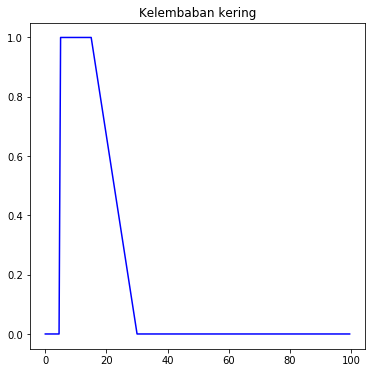

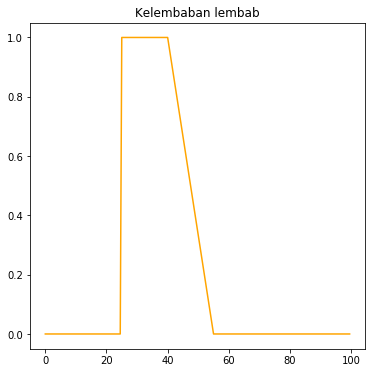

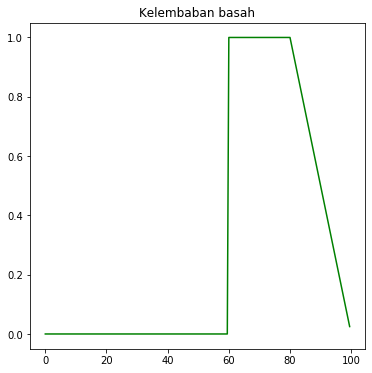

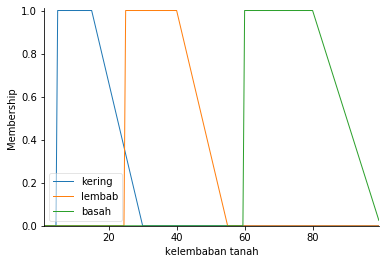

In [8]:
kelembaban_tanah['kering'] = fuzz.trapmf(kelembaban_tanah.universe, [5, 5, 15, 30])
kelembaban_kering = fuzz.trapmf(kelembaban_x,[5,5,15,30])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kelembaban_x,kelembaban_kering,'blue')
ax0.set_title('Kelembaban kering')

kelembaban_tanah['lembab'] = fuzz.trapmf(kelembaban_tanah.universe, [25, 25, 40, 55])
kelembaban_lembab = fuzz.trapmf(kelembaban_x,[25,25,40,55])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kelembaban_x,kelembaban_lembab,'orange')
ax0.set_title('Kelembaban lembab')

kelembaban_tanah['basah'] = fuzz.trapmf(kelembaban_tanah.universe, [60, 60, 80, 100])
kelembaban_basah = fuzz.trapmf(kelembaban_x,[60,60,80,100])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kelembaban_x,kelembaban_basah,'green')
ax0.set_title('Kelembaban basah')

kelembaban_tanah.view()

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Fuzifikasi Suhu Udara

menunjukkan nilai-nilai dari himpunan fuzzy suhu udara, nilai-nilai yang diperoleh pada gambar tersebut diperoleh dari 
hasil pengamatan yang dilakukan peneliti  menggunakan sensor LM35. Penentuan rentang nilai untuk dingin, sejuk, hangat, 
dan panas diperoleh dari hasil wawancara yang dilakukan oleh peneliti dengan masyarakat sekitar.

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Untuk suhu udara, fungsi keanggotaan dibagi menjadi 4 bagian :
$$ Suhu Udara $$
$$ Dingin = 8^{\circ}C - 18^{\circ}C$$
$$ Sedang = 20^{\circ}C - 26^{\circ}C$$
$$ Hangat = 28^{\circ}C - 33^{\circ}C$$
$$ Panas = 27^{\circ}C - 41^{\circ}C$$


Dengan fungsi keanggotaan suhu udara

\begin{equation}
  suhu['dingin'] = \mu SuhuDingin(x)=\begin{cases}
    1, & \text{$8\leq x\leq12$}.\\
    (18 - x)/(18 - 12) , & \text{$12 \leq x \leq 18$}.\\
    0, & \text{$x\geq 18$}.
  \end{cases}
  \\
  suhu['sedang'] = \mu SuhuSejuk(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq26$}.\\
    (x - 20)/(22 - 20) , & \text{$20 \leq x \leq 22$}.\\
    (26 - x)/(26 - 22) , & \text{$22 \leq x \leq 26$}.\\
  \end{cases}
  \\
    suhu ['hangat'] = \mu SuhuHangat(x)=\begin{cases}
    0, & \text{$x\leq 28$ atau $x\geq33$}.\\
    (x - 28)/(30 - 28) , & \text{$28 \leq x \leq 30$}.\\
    (33 - x)/(33 - 30) , & \text{$30 \leq x \leq 33$}.\\
  \end{cases}
  \\
    suhu['panas'] = \mu SuhuPanas(x)=\begin{cases}
    0, & \text{$x\leq 27$}.\\
    (x - 27)/(32 - 27) , & \text{$27 \leq x \leq 32$}.\\
    1, & \text{$x\geq 32$}.
  \end{cases}
\end{equation}

# PLOTTING MEMBERSHIP FUNCTION SUHU UDARA

Text(0.5, 1.0, 'Suhu dingin')

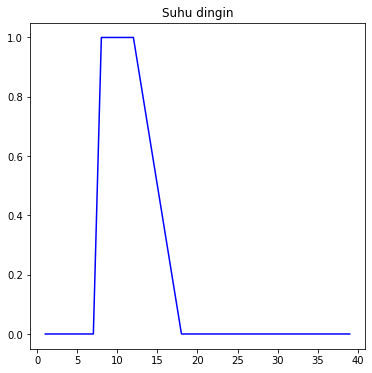

In [9]:
suhu_udara['dingin'] = fuzz.trapmf(suhu_udara.universe,[8,8,12,18]) 
suhu_dingin = fuzz.trapmf(suhu_x,[8,8,12,18])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(suhu_x,suhu_dingin,'blue')
ax0.set_title('Suhu dingin')

Text(0.5, 1.0, 'Suhu sedang')

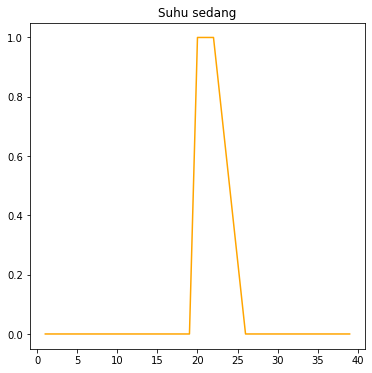

In [10]:
suhu_udara['sedang'] = fuzz.trapmf(suhu_udara.universe,[20,20,22,26]) 
suhu_sedang = fuzz.trapmf(suhu_x,[20,20,22,26])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(suhu_x,suhu_sedang,'orange')
ax0.set_title('Suhu sedang')

Text(0.5, 1.0, 'Suhu hangat')

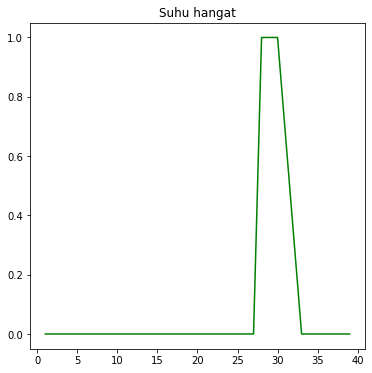

In [11]:
suhu_udara['hangat'] = fuzz.trapmf(suhu_udara.universe,[28,28,30,33])
suhu_hangat = fuzz.trapmf(suhu_x,[28,28,30,33])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(suhu_x,suhu_hangat,'green')
ax0.set_title('Suhu hangat')

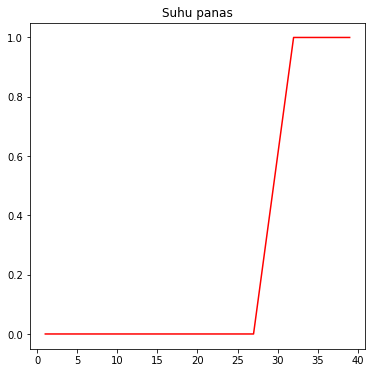

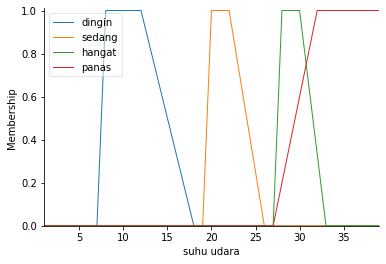

In [25]:
suhu_udara['panas'] = fuzz.trapmf(suhu_udara.universe,[27,32,41,41]) 
suhu_panas = fuzz.trapmf(suhu_x,[27,32,41,41])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(suhu_x,suhu_panas,'red')
ax0.set_title('Suhu panas')
suhu_udara.view()

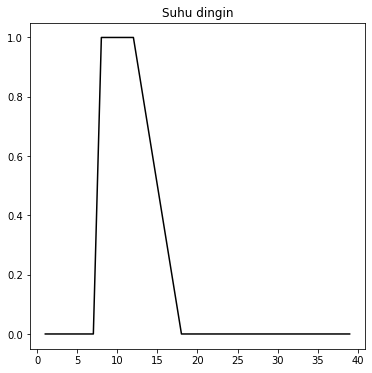

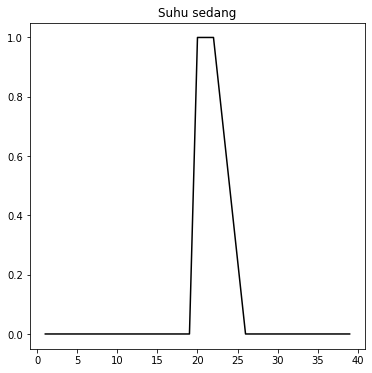

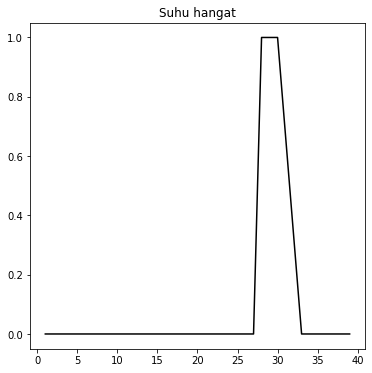

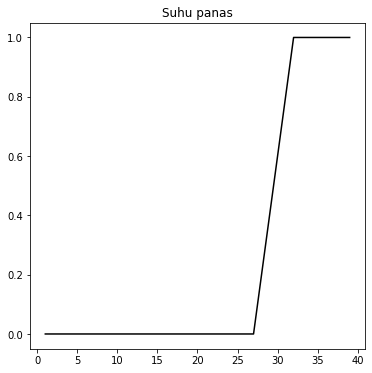

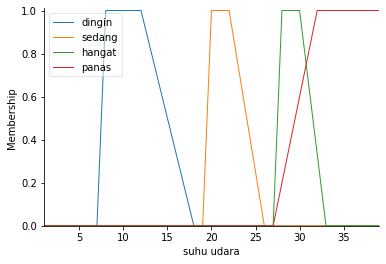

In [12]:
suhu_udara['dingin'] = fuzz.trapmf(suhu_udara.universe,[8,8,12,18]) 
suhu_dingin = fuzz.trapmf(suhu_x,[8,8,12,18])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(suhu_x,suhu_dingin,'black')
ax0.set_title('Suhu dingin')
suhu_udara['sedang'] = fuzz.trapmf(suhu_udara.universe,[20,20,22,26]) 
suhu_sedang = fuzz.trapmf(suhu_x,[20,20,22,26])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(suhu_x,suhu_sedang,'black')
ax0.set_title('Suhu sedang')
suhu_udara['hangat'] = fuzz.trapmf(suhu_udara.universe,[28,28,30,33])
suhu_hangat = fuzz.trapmf(suhu_x,[28,28,30,33])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(suhu_x,suhu_hangat,'black')
ax0.set_title('Suhu hangat')
suhu_udara['panas'] = fuzz.trapmf(suhu_udara.universe,[27,32,41,41]) 
suhu_panas = fuzz.trapmf(suhu_x,[27,32,41,41])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(suhu_x,suhu_panas,'black')
ax0.set_title('Suhu panas')
suhu_udara.view()

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Fuzifikasi Durasi

Keadaan dimana air akan keluar berdasarkan waktunya
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

waktu penyiraman diberi nama durasi Dibagi menjadi 4 fungsi keanggotaan 
$$ Durasi $$
$$ Sangat Cepat = 3 - 5 Detik $$
$$ Cepat = 4 - 9 Detik $$
$$ Sedang = 8 - 17 detik $$
$$ Lama = 16 - 20 detik $$


Dengan fungsi keanggotaan suhu udara

\begin{equation}
  durasi['Sangat Cepat'] = \mu DurasiSangatCepat(x)=\begin{cases}
    1, & \text{$3\leq x \leq 4$}.\\
    \left.(5 - x) \,  \right/(5 - 4) , & \text{$4 \leq x \leq 5$}.\\
    0, & \text{$x\geq 5$}.
  \end{cases}
  \\
    durasi['cepat'] = \mu DurasiCepat(x)=\begin{cases}
    0, & \text{$x\leq 4$ atau $x\geq9$}.\\
    \left.(x - 4)\, \right/(7 - 4) , & \text{$4 \leq x \leq 7$}.\\
    \left.(9 - x)\, \right/(9 - 7) , & \text{$7 \leq x \leq 9$}.\\
  \end{cases}
  \\
    durasi['sedang'] = \mu DurasiSedang(x)=\begin{cases}
    0, & \text{$x\leq 8$ atau $x\geq17$}.\\
    \left.(x - 8)\, \right/(15 - 8) , & \text{$8 \leq x \leq 15$}.\\
    \left.(17 - x)\, \right/(17 - 10) , & \text{$15 \leq x \leq 17$}.\\
  \end{cases}
  \\
   durasi['lama'] = \mu DurasiLama(x)=\begin{cases}
    0, & \text{$x\leq 11$ atau $x\geq20$}.\\
    \left.(x - 16)\, \right/(18 - 16) , & \text{$16 \leq x \leq 18$}.\\
    \left.(20 - x)\, \right/(20 - 18) , & \text{$18 \leq x \leq 20$}.\\
  \end{cases}
 \\
\end{equation}
   


Text(0.5, 1.0, 'tidak disiram')

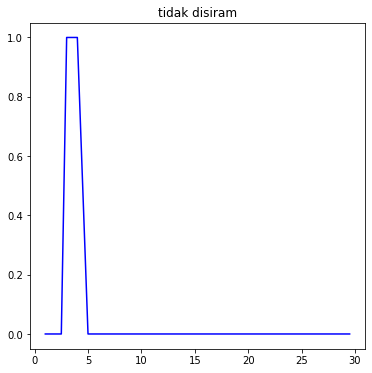

In [13]:
durasi_tidak_disiram = fuzz.trapmf(durasi_x,[3,3,4,5])
fig,(ax0)= plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(durasi_x,durasi_tidak_disiram,'blue')
ax0.set_title('tidak disiram')

Text(0.5, 1.0, 'cepat')

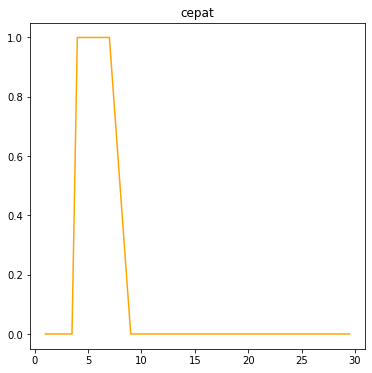

In [14]:
durasi['cepat'] = fuzz.trapmf(durasi.universe,[4,4,7,9])
durasi_cepat = fuzz.trapmf(durasi_x,[4,4,7,9])
fig,(ax0)= plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(durasi_x,durasi_cepat,'orange')
ax0.set_title('cepat')


Text(0.5, 1.0, 'sedang')

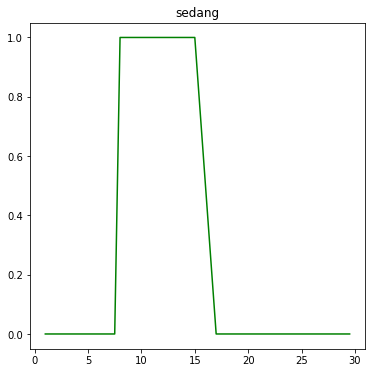

In [15]:
durasi['sedang'] = fuzz.trapmf(durasi.universe,[8,8,15,17]) 
durasi_sedang = fuzz.trapmf(durasi_x,[8,8,15,17])
fig,(ax0)= plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(durasi_x,durasi_sedang,'green')
ax0.set_title('sedang')


Text(0.5, 1.0, 'lama')

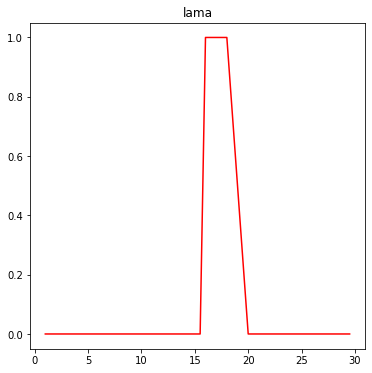

In [16]:
durasi['lama'] = fuzz.trapmf(durasi.universe,[16,16,18,20]) 
durasi_lama = fuzz.trapmf(durasi_x,[16,16,18,20])
fig,(ax0)= plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(durasi_x,durasi_lama,'red')
ax0.set_title('lama')

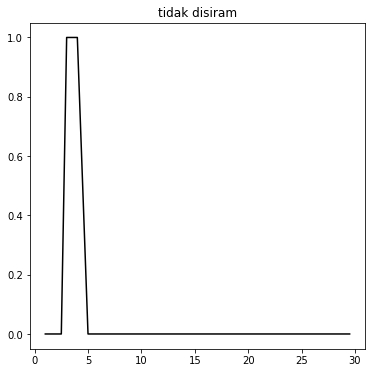

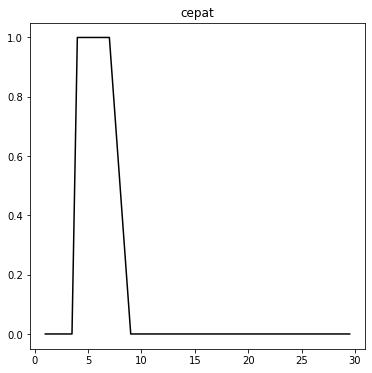

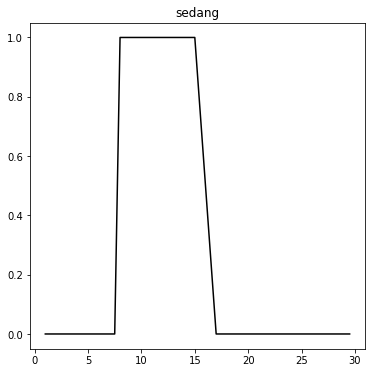

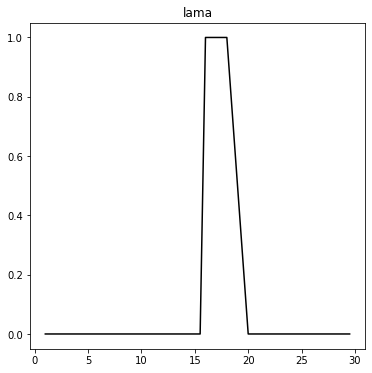

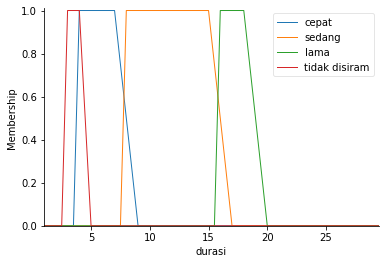

In [17]:
durasi['tidak disiram'] = fuzz.trapmf(durasi.universe,[3,3,4,5])
durasi_tidak_disiram = fuzz.trapmf(durasi_x,[3,3,4,5])
fig,(ax0)= plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(durasi_x,durasi_tidak_disiram,'black')
ax0.set_title('tidak disiram')

durasi['cepat'] = fuzz.trapmf(durasi.universe,[4,4,7,9])
durasi_cepat = fuzz.trapmf(durasi_x,[4,4,7,9])
fig,(ax0)= plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(durasi_x,durasi_cepat,'black')
ax0.set_title('cepat')

durasi['sedang'] = fuzz.trapmf(durasi.universe,[8,8,15,17]) 
durasi_sedang = fuzz.trapmf(durasi_x,[8,8,15,17])
fig,(ax0)= plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(durasi_x,durasi_sedang,'black')
ax0.set_title('sedang')

durasi['lama'] = fuzz.trapmf(durasi.universe,[16,16,18,20]) 
durasi_lama = fuzz.trapmf(durasi_x,[16,16,18,20])
fig,(ax0)= plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(durasi_x,durasi_lama,'black')
ax0.set_title('lama')

durasi.view()

# Rule Base (HIMPUNAN KEPUTUSAN)
Komponen aturan
Langkah pertama pengambilan keputusan metode Mamdani adalah melakukan proses fuzifikasi
untuk memetakan data tegas masukan kesalahan dan beda kesalahan data fuzzy sesuai dengan
tipe dan bentuk fungsi keanggotaan. Langkah kedua adalah melakukan proses terhadap kedua
data fuzzy tersebut dengan operator AND yang akan mengambil nilai paling minimal dari dua
data tersebut. Langkah ketiga dengan impilasi MIN akan memotong fungsi keanggotaan keluaran
setelah melalui operator AND sehingga didapat daerah fuzzy. Ketiga proses tersebut juga
diterapkan pada aturan-aturan fuzzy berikutnya. Setelah aturan fuzzy dieksekusi, dilakukan
proses komposisi dengan metode MAX yaitu solusi himpunan fuzzy diperoleh dengan cara
mengambil nilai maksimum aturan, kemudian menggunakannya untuk memodifikasi daerah
fuzzy, dan mengaplikasikan ke output dengan menggunakan operator OR (union). Jika proposisi
telah dievaluasi, maka output akan berisi suatu himpunan fuzzy yang merefleksikan konstribusi
dari tiap-tiap proposisi. Setelah proses implikasi dan komposisi telah dilakukan makan proses
selanjutnya adalah proses defuzzifikasi.


Aplikasi fungsi implikasi (aturan)

Terdapat 12 aturan fuzzy, yaitu: IF kelembaban tanah = kering AND suhu udara = dingin THEN durasi = cepat

1. IF kelembaban tanah = kering AND suhu udara = dingin THEN durasi = cepat

2. IF kelembaban tanah = kering AND suhu udara = Sedang THEN durasi = sedang

3. IF kelembaban tanah = kering AND suhu udara = hangat THEN durasi = lama

4. IF kelembaban tanah = kering AND suhu udara = panas THEN durasi = lama

5. IF kelembaban tanah = lembab AND suhu udara = dingin THEN durasi = tidak disiram

6. IF kelembaban tanah = lembab AND suhu udara = Sedang THEN durasi = cepat

7. IF kelembaban tanah = lembab AND suhu udara = hangat THEN durasi = sedang

8. IF kelembaban tanah = lembab AND suhu udara = panas THEN durasi = sedang

9. IF kelembaban tanah = basah AND suhu udara = dingin THEN durasi = tidak disiram

10. IF kelembaban tanah = basah AND suhu udara = Sedang THEN durasi = tidak disiram

11. IF kelembaban tanah = basah AND suhu udara = hangat THEN durasi = sedang

12. IF kelembaban tanah = basah AND suhu udara = panas THEN durasi = sedang

In [18]:
rule1 = ctrl.Rule(kelembaban_tanah['kering'] & suhu_udara['dingin'], durasi['cepat'])
rule2 = ctrl.Rule(kelembaban_tanah['kering'] & suhu_udara['sedang'], durasi['sedang'])
rule3 = ctrl.Rule(kelembaban_tanah['kering'] & suhu_udara['hangat'], durasi['lama'])
rule4 = ctrl.Rule(kelembaban_tanah['kering'] & suhu_udara['panas'], durasi['lama'])
rule5 = ctrl.Rule(kelembaban_tanah['lembab'] & suhu_udara['dingin'], durasi['tidak disiram'])
rule6 = ctrl.Rule(kelembaban_tanah['lembab'] & suhu_udara['hangat'], durasi['lama'])
rule7 = ctrl.Rule(kelembaban_tanah['lembab'] & suhu_udara['hangat'], durasi['sedang'])
rule8 = ctrl.Rule(kelembaban_tanah['lembab'] & suhu_udara['panas'], durasi['sedang'])
rule9 = ctrl.Rule(kelembaban_tanah['basah'] & suhu_udara['dingin'], durasi['tidak disiram'])
rule10 = ctrl.Rule(kelembaban_tanah['basah'] & suhu_udara['sedang'], durasi['tidak disiram'])
rule11 = ctrl.Rule(kelembaban_tanah['basah'] & suhu_udara['hangat'], durasi['sedang'])
rule12 = ctrl.Rule(kelembaban_tanah['basah'] & suhu_udara['panas'], durasi['sedang'])

In [19]:
siram_ctrl = ctrl.ControlSystem( [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12,])
siram = ctrl.ControlSystemSimulation(siram_ctrl)

# Penegasan (defuzzyfikasi)
Input dari proses defuzzyfikasi adalah suatu himpunan fuzzy yang diperoleh dari komposisi
aturan-aturan fuzzy, sedangkan output yang dihasilkan merupakan suatu bilangan pada domain
himpunan fuzzy tersebut. Jika diberikan suatu himSpunan fuzzy dalam range tertentu, maka
dapat diambil suatu nilai crisp tertentu sebagai output[7]. Defuzifikasi pada komposisi aturan
Mamdani. Diantaranya yaitu metode COA, bisektor, MOM, LOM, dan SOM

kelembaban tanah:14
suhu udara:29
17.42307692307692


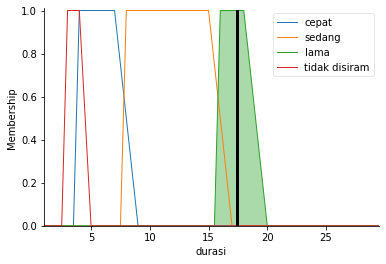

In [20]:
siram = ctrl.ControlSystemSimulation(siram_ctrl)

siram.input['kelembaban tanah']=int(input("kelembaban tanah:"))
siram.input['suhu udara']=int(input("suhu udara:"))

siram.compute()
print(siram.output['durasi'])

durasi.view (sim=siram)


^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Perhitungan Manual
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

\begin{equation}
  Kelembaban = 14 \\
  kelembaban['kering'] = \mu KelembabanKering(x)=\begin{cases}
    1, & \text{$5\leq x \leq 15$}.\checkmark \\
    \left.(30 - x) \,  \right/(30 - 15) , & \text{$15 \leq x \leq 30$}.\\
    0, & \text{$x\geq 30$}.
  \end{cases}
  \\
    kelembaban['lembab'] = \mu KelembabanLembab(x)=\begin{cases}
    0, & \text{$x\leq 25$ atau $x\geq55$}.\checkmark \\
    \left.(x - 55)\, \right/(55 - 25) , & \text{$25 \leq x \leq 40$}.\\
    \left.(55 - x)\, \right/(55 - 40) , & \text{$40 \leq x \leq 55$}.\\
  \end{cases}
  \\
  kelembaban['basah'] = \mu KelembabanBasah(x)=\begin{cases}
    0, & \text{$x \leq 60$}.\checkmark \\
    \left.(x - 60) \,  \right/(80 - 60) , & \text{$55 \leq x \leq 60$}.\\
    1, & \text{$x\geq 55$}.
  \end{cases}
\end{equation}


\begin{equation}
 \mu KelembabanKering(x) = 1
\end{equation}





\begin{equation}
Suhu = 29\\
  suhu['dingin'] = \mu SuhuDingin(x)=\begin{cases}
    1, & \text{$8\leq x\leq12$}.\\
    (18 - x)/(18 - 12) , & \text{$12 \leq x \leq 18$}.\\
    0, & \text{$x\geq 18$}.\checkmark \\
  \end{cases}
  \\
  suhu['sedang'] = \mu SuhuSejuk(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq26$}.\checkmark \\
    (x - 20)/(22 - 20) , & \text{$20 \leq x \leq 22$}.\\
    (26 - x)/(26 - 22) , & \text{$22 \leq x \leq 26$}.\\
  \end{cases}
  \\
    suhu ['hangat'] = \mu SuhuHangat(x)=\begin{cases}
    0, & \text{$x\leq 28$ atau $x\geq33$}.\\
    (x - 28)/(30 - 28) , & \text{$28 \leq x \leq 30$}.\checkmark \\
    (33 - x)/(33 - 30) , & \text{$30 \leq x \leq 33$}.\\
  \end{cases}
  \\
    suhu['panas'] = \mu SuhuPanas(x)=\begin{cases}
    0, & \text{$x\leq 27$}.\\
    (x - 27)/(32 - 27) , & \text{$27 \leq x \leq 32$}. \checkmark \\
    1, & \text{$x\geq 32$}.\\
  \end{cases}
\end{equation}

Suhu Hangat = 0,5
Suhu Panas  = 0,4


^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
1. IF kelembaban tanah = kering AND suhu udara = dingin THEN durasi = cepat
$$ \\ \alpha(predikat_1) = \mu KelembabanKering  \cap \mu SuhuDingin $$
$$\alpha(predikat_1)   = min (\mu KelembabanKering[14], \mu SuhuDingin [29]) $$
$$ \alpha(predikat_1) = min (1; 0) $$
$$ \alpha(predikat_1) = 0 $$

$$
durasi['cepat'] = \mu DurasiCepat(x)=\begin{cases}
    0, & \text{$x\leq 6$ atau $x\geq10$}.\\
    \left.(x - 6)\, \right/(6 - 3) , & \text{$3 \leq x \leq 6$}.\\
    \left.(8 - x)\, \right/(8 - 6) , & \text{$6 \leq x \leq 8$}.\\
  \end{cases}
$$
Maka nilai $ Z_1 = 0 $

=================================================================================================================
2. IF kelembaban tanah = kering AND suhu udara = Sedang THEN durasi = sedang


$$ \\ \alpha(predikat_1) = \mu KelembabanKering  \cap \mu SuhuSedang $$
$$\alpha(predikat_1)   = min (\mu KelembabanKering[14], \mu SuhuSedang [29]) $$
$$ \alpha(predikat_1) = min (1 ; 0) $$
$$ \alpha(predikat_1) = 0 $$

Lalu lihat himpunan Durasi Sedang 
$$
    durasi['sedang'] = \mu DurasiSedang(x)=\begin{cases}
    0, & \text{$x\leq 8$ atau $x\geq17$}.\\
    \left.(x - 8)\, \right/(15 - 8) , & \text{$8 \leq x \leq 15$}.\\
    \left.(17 - x)\, \right/(17 - 10) , & \text{$15 \leq x \leq 17$}.\\
  \end{cases}
 $$
Maka nilai $ Z_2 = 0 $

=================================================================================================================

3. IF kelembaban tanah = kering AND suhu udara = hangat THEN durasi = lama

$$ \\ \alpha(predikat_1) = \mu KelembabanKering  \cap \mu SuhuHangat $$
$$\alpha(predikat_1)   = min (\mu KelembabanKering[14], \mu SuhuHangat[29]) $$
$$ \alpha(predikat_1) = min (1; 0,5) $$
$$ \alpha(predikat_1) = 0,5 $$

Lalu lihat himpunan Durasi Lama 
$$
 durasi['lama'] = \mu DurasiLama(x)=\begin{cases}
    0, & \text{$x\leq 11$ atau $x\geq20$}.\\
    \left.(x - 16)\, \right/(18 - 16) , & \text{$16 \leq x \leq 18$}.\\
    \left.(20 - x)\, \right/(20 - 18) , & \text{$18 \leq x \leq 20$}.\\
  \end{cases}
$$
Terdapat 2 nilai keanggotaan maka kita uji satu persatu
 $$(x- 16) / (18 - 16) = 0,5 $$
 $$ x - 16 = 0.5\times 2 $$
 $$ x - 16 = 1 $$
 $$ x = 17 $$
 
 $$ (20 -x) / (20 -18) = 0.5  $$
 $$ (20 - x) = 0.5 \times 2 $$
 $$ (20 - x)  = 1 $$
 $$ x = 19 $$
Akan diambil nilai terkecil
Maka nilai $ Z_4 = 17 $

=================================================================================================================

4. IF kelembaban tanah = kering AND suhu udara = panas THEN durasi = lama

$$ \\ \alpha(predikat_1) = \mu KelembabanKering  \cap \mu SuhuPanas $$
$$\alpha(predikat_1)   = min (\mu KelembabanKering[1], \mu SuhuPanas[0,4]) $$
$$ \alpha(predikat_1) = min (1;0.4) $$
$$ \alpha(predikat_1) = 0.4 $$

Lalu lihat himpunan Durasi Lama 
$$
 durasi['lama'] = \mu DurasiLama(x)=\begin{cases}
    0, & \text{$x\leq 11$ atau $x\geq20$}.\\
    \left.(x - 16)\, \right/(18 - 16) , & \text{$16 \leq x \leq 18$}.\\
    \left.(20 - x)\, \right/(20 - 18) , & \text{$18 \leq x \leq 20$}.\\
  \end{cases}
$$
Terdapat 2 nilai keanggotaan maka kita uji satu persatu
 $$(x- 16) / (18 - 16) = 0.4 $$
 $$ x - 16 = 0.4 \times 2 $$
 $$ x - 16 = 0.8 $$
 $$ x = 16,8 $$
 
 
Maka nilai $ Z_4 = 16.8 $

=================================================================================================================

5. IF kelembaban tanah = lembab AND suhu udara = dingin THEN durasi = tidak disiram

$$ \\ \alpha(predikat_1) = \mu KelembabanLembab  \cap \mu Suhudingin $$
$$\alpha(predikat_1)   = min (\mu Kelembabanlembab[14], \mu Suhudingin[29]) $$
$$ \alpha(predikat_1) = min (0;0) $$
$$ \alpha(predikat_1) = 0 $$


Lalu lihat himpunan Durasi Tidak disiram 
$$
  durasi['tidak disiram'] = \mu DurasiSangatCepat(x)=\begin{cases}
    1, & \text{$2\leq x \leq 4$}.\\
    \left.(5 - x) \,  \right/(5 - 4) , & \text{$4 \leq x \leq 5$}.\\
    0, & \text{$x\geq 5$}.
  \end{cases}
$$
Akan diambil nilai terkecil
Maka nilai $ Z_5 = 0 $

=================================================================================================================
6. IF kelembaban tanah = lembab AND suhu udara = sedang THEN durasi = cepat

$$ \\ \alpha(predikat_1) = \mu KelembabanLembab  \cap \mu SuhuSedang $$
$$\alpha(predikat_1)   = min (\mu Kelembabanlembab[14], \mu SuhuSedang[29]) $$
$$ \alpha(predikat_1) = min (0;0) $$
$$ \alpha(predikat_1) = 0 $$

$$
   durasi['cepat'] = \mu DurasiCepat(x)=\begin{cases}
    0, & \text{$x\leq 6$ atau $x\geq10$}.\\
    \left.(x - 6)\, \right/(6 - 3) , & \text{$3 \leq x \leq 6$}.\\
    \left.(8 - x)\, \right/(8 - 6) , & \text{$6 \leq x \leq 8$}.\\
  \end{cases}
$$
Akan diambil nilai terkecil
Maka nilai $ Z_5 = 0 $

=================================================================================================================

7. IF kelembaban tanah = lembab AND suhu udara = hangat THEN durasi = sedang
$$ \\ \alpha(predikat_1) = \mu KelembabanLembab  \cap \mu SuhusHangat $$
$$\alpha(predikat_1)   = min (\mu Kelembabanlembab[0], \mu SuhuHangat[0,5]) $$
$$ \alpha(predikat_1) = min (0;0,5) $$
$$ \alpha(predikat_1) = 0 $$

$$
  durasi['sedang'] = \mu DurasiSedang(x)=\begin{cases}
    0, & \text{$x\leq 7$ atau $x\geq12$}.\\
    \left.(x - 7)\, \right/(10 - 7) , & \text{$7 \leq x \leq 10$}.\\
    \left.(12 - x)\, \right/(12 - 10) , & \text{$10 \leq x \leq 12$}.\\
  \end{cases}
$$
Akan diambil nilai terkecil
Maka nilai $ Z_7 = 0 $

=================================================================================================================

8. IF kelembaban tanah = lembab AND suhu udara = panas THEN durasi = sedang
$$ \\ \alpha(predikat_1) = \mu KelembabanLembab  \cap \mu SuhuPanas $$
$$\alpha(predikat_1)   = min (\mu Kelembabanlembab[14], \mu SuhuPanas[29]) $$
$$ \alpha(predikat_1) = min (0;0,4) $$
$$ \alpha(predikat_1) = 0 $$
$$
  durasi['sedang'] = \mu DurasiSedang(x)=\begin{cases}
    0, & \text{$x\leq 7$ atau $x\geq12$}.\\
    \left.(x - 7)\, \right/(10 - 7) , & \text{$7 \leq x \leq 10$}.\\
    \left.(12 - x)\, \right/(12 - 10) , & \text{$10 \leq x \leq 12$}.\\
  \end{cases}
$$
Akan diambil nilai terkecil
Maka nilai $ Z_8 = 0 $

=================================================================================================================
 
9. IF kelembaban tanah = basah AND suhu udara = dingin THEN durasi = tidak disiram
$$ \\ \alpha(predikat_1) = \mu KelembabanBasah \cap \mu Suhudingin $$
$$\alpha(predikat_1)   = min (\mu Kelembabanbasah[14], \mu Suhudingin[29]) $$
$$ \alpha(predikat_1) = min (0;0) $$
$$ \alpha(predikat_1) = 0 $$

Lalu lihat himpunan Durasi Tidak disiram 
$$
  durasi['tidak disiram'] = \mu DurasiSangatCepat(x)=\begin{cases}
    1, & \text{$2\leq x \leq 4$}.\\
    \left.(5 - x) \,  \right/(5 - 4) , & \text{$4 \leq x \leq 5$}.\\
    0, & \text{$x\geq 5$}.
  \end{cases}
$$
Akan diambil nilai terkecil
Maka nilai $ Z_9 = 0 $


=================================================================================================================

10. IF kelembaban tanah = basah AND suhu udara = Sedang THEN durasi = tidak disiram
 
$$ \\ \alpha(predikat_1) = \mu KelembabanBasah \cap \mu SuhuSedang $$
$$\alpha(predikat_1)   = min (\mu Kelembabanbasah[14], \mu SuhuSedang[29]) $$
$$ \alpha(predikat_1) = min (0;0) $$
$$ \alpha(predikat_1) = 0 $$
Lalu lihat himpunan Durasi Tidak disiram 
$$
  durasi['tidak disiram'] = \mu DurasiSangatCepat(x)=\begin{cases}
    1, & \text{$2\leq x \leq 4$}.\\
    \left.(5 - x) \,  \right/(5 - 4) , & \text{$4 \leq x \leq 5$}.\\
    0, & \text{$x\geq 5$}.
  \end{cases}
$$
Akan diambil nilai terkecil
Maka nilai $ Z_10 = 0 $


=================================================================================================================

11. IF kelembaban tanah = basah AND suhu udara = hangat THEN durasi = sedang
$$ \\ \alpha(predikat_1) = \mu KelembabanBasah \cap \mu SuhuHangat $$
$$\alpha(predikat_1)   = min (\mu Kelembabanbasah[14], \mu SuhuHangat[29]) $$
$$ \alpha(predikat_1) = min (0;0,5) $$
$$ \alpha(predikat_1) = 0 $$

Lalu lihat himpunan Durasi Sedang 
$$
    durasi['sedang'] = \mu DurasiSedang(x)=\begin{cases}
    0, & \text{$x\leq 8$ atau $x\geq17$}.\\
    \left.(x - 8)\, \right/(15 - 8) , & \text{$8 \leq x \leq 15$}.\\
    \left.(17 - x)\, \right/(17 - 10) , & \text{$15 \leq x \leq 17$}.\\
  \end{cases}
 $$
Maka nilai $ Z_11 = 0 $

=================================================================================================================

12. IF kelembaban tanah = basah AND suhu udara = panas THEN durasi = sedang
$$ \\ \alpha(predikat_1) = \mu KelembabanBasah \cap \mu SuhuPanas $$
$$\alpha(predikat_1)   = min (\mu Kelembabanbasah[14], \mu SuhuPanas[29]) $$
$$ \alpha(predikat_1) = min (0;0,4) $$
$$ \alpha(predikat_1) = 0 $$

Lalu lihat himpunan Durasi Sedang 
$$
    durasi['sedang'] = \mu DurasiSedang(x)=\begin{cases}
    0, & \text{$x\leq 8$ atau $x\geq17$}.\\
    \left.(x - 8)\, \right/(15 - 8) , & \text{$8 \leq x \leq 15$}.\\
    \left.(17 - x)\, \right/(17 - 10) , & \text{$15 \leq x \leq 17$}.\\
  \end{cases}
 $$
Maka nilai $ Z_11 = 0 $


Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 +
\alpha predikat_1\,_0 \times Z_1\,_1 +
\alpha predikat_1\,_1 \times Z_1\,_2 +
\alpha predikat_1\,_2 \times Z_1\,_2 +}
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9 + \alpha predikat_1\,_0 +
\alpha predikat_1\,_1 + \alpha predikat_1\,_2}$$

$$Z = \frac{0 + 0 + 0.5 \times 17.5 + 0.4 \times 16.8 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0}{0 + 0 + 0.5 + 0.4 + 0 + 0 + 0 + 0 + 0 +0 +0 +0} $$
 
 $$ Z = \frac{8,5 + 6,72}{0.75} $$
 $$ Z = 19,025 \, detik $$

Hasil yang digunakan menggunakan perhitungan python adalah 17.42307692307692 dan pada Hitungan manual adalah 19,025 dari keduanya terdapat selisih nilai yaitu sebesar 1,595 dan terdapat eror sebesar 7,975%